In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers

In [3]:
df = pd.read_csv("onlinefraud.csv")
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
for i in df.columns:
    if df[i].dtype == "object":
        print(df[i].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(6362620, 11)

In [11]:
df.drop(columns=["nameOrig","nameDest"], inplace = True)

In [12]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

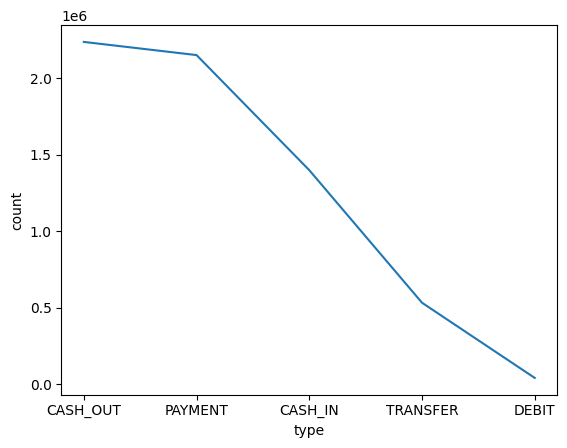

In [19]:
import seaborn as sns
sns.lineplot(df["type"].value_counts())

In [20]:
df["type"] = df["type"].map({"CASH_OUT":0, "PAYMENT":1, "CASH_IN":2, "TRANSFER":3, 'DEBIT':4})

In [22]:
df["type"].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


In [31]:
len(df["step"].value_counts())

743

In [33]:
for i in df.columns:
    print(len(df[i].value_counts()))

743
5
5316900
1845844
2682586
3614697
3555499
2
2


In [34]:
X = df.drop(columns = ["isFraud","isFlaggedFraud"])
Y = df["isFraud"]

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [47]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [48]:
model = Sequential()

In [50]:
model.add(layers.Dense(units=32,activation = "relu", input_dim = X_train.shape[1]))
model.add(layers.Dense(units=16, activation="relu"))
layers.Dropout(0.3)
model.add(layers.Dense(units=16, activation="relu"))
layers.Dropout(0.4)
model.add(layers.Dense(units=1))

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [52]:
history = model.fit(X_train, Y_train, validation_split=0.2, callbacks=[callback], epochs = 10)

Epoch 1/10
127253/127253 [==============================] - 173s 1ms/step - loss: 2473900.2500 - accuracy: 0.9600 - val_loss: 0.0013 - val_accuracy: 0.9987
Epoch 2/10
127253/127253 [==============================] - 178s 1ms/step - loss: 0.0013 - accuracy: 0.9987 - val_loss: 0.0013 - val_accuracy: 0.9987
Epoch 3/10
127253/127253 [==============================] - 174s 1ms/step - loss: 0.0013 - accuracy: 0.9987 - val_loss: 0.0013 - val_accuracy: 0.9987
Epoch 4/10
127253/127253 [==============================] - 177s 1ms/step - loss: 0.0013 - accuracy: 0.9987 - val_loss: 0.0013 - val_accuracy: 0.9987
Epoch 5/10
127253/127253 [==============================] - 175s 1ms/step - loss: 0.0013 - accuracy: 0.9987 - val_loss: 0.0013 - val_accuracy: 0.9987
Epoch 6/10
127253/127253 [==============================] - 183s 1ms/step - loss: 0.0013 - accuracy: 0.9987 - val_loss: 0.0013 - val_accuracy: 0.9987
Epoch 7/10
127253/127253 [==============================] - 173s 1ms/step - loss: 0.0013 - acc

In [53]:
Y_pred = model.predict(X_test)

39767/39767 [==============================] - 35s 881us/step


In [58]:
score = model.evaluate(X_test,Y_test)

39767/39767 [==============================] - 73s 2ms/step - loss: 0.0013 - accuracy: 0.9987


In [63]:
#loss
score[0]

0.0012861693976446986

In [64]:
# Accuracy
score[1]

0.9987434148788452

In [60]:
mean_absolute_error(Y_test, Y_pred)

0.008144510595215846

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(Y_test, Y_pred)

0.0012868872580959249